In [179]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [74]:
# Load the dataset 
data = pd.read_csv("Heisman_Winners.csv")
df = pd.DataFrame(data)

# update missing data
df.at[16, "Average Yards"] = 8.7
df

,Year,Player,School,Completions,Attempts,Average Yards,Total Yards,Touchdowns,Int,Rec,Position
0,2021,Bryce Young,Alabama,366.0,547.0,NaN,4872.0,47.0,7.0,NaN,QB
1,2020,DeVonta Smith,Alabama,NaN,NaN,15.9,1856.0,23.0,NaN,117.0,WR
2,2019,Joe Burrow,LSU,402.0,527.0,NaN,5671.0,60.0,6.0,NaN,QB
3,2018,Kyler Murray,Oklahoma,260.0,377.0,NaN,4361.0,42.0,7.0,NaN,QB
4,2017,Baker Mayfield,Oklahoma,285.0,404.0,NaN,4627.0,43.0,6.0,NaN,QB
...,...,...,...,...,...,...,...,...,...,...,...
82,1939,Nile Kinnick,Iowa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RB
83,1938,Davey O'Brien,TCU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QB
84,1937,Clint Frank,Yale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QB
85,1936,Larry Kelley,Yale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DE


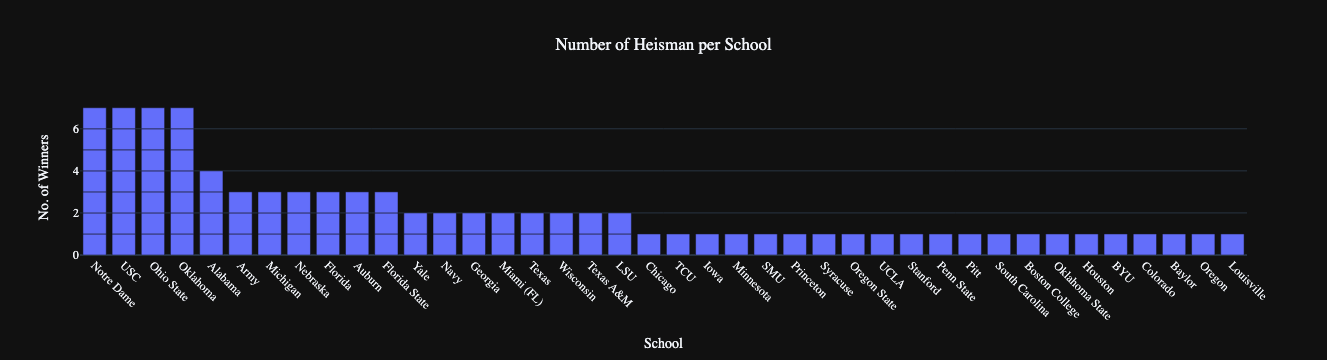

In [160]:
fig = px.bar(df, x="School", title="Number of Heisman per School")
fig.update_xaxes(
    categoryorder="total descending",
    tickangle=45)
fig.update_layout(
    template="plotly_dark",
    font_family="Open sans",
    title=dict(x=0.5),
    yaxis_title="No. of Winners")
fig.show()

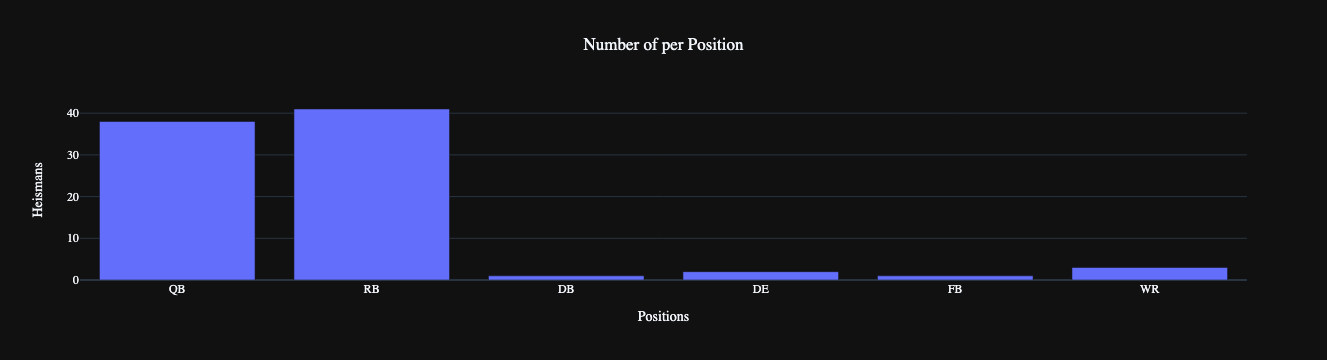

In [164]:
positionsx = ["QB", "RB", "DB", "DE", "FB", "WR"]
#get the number of times each position occurs
positionsy = [
    len(df.loc[df["Position"] == "QB"]),
    len(df.loc[df["Position"] == "RB"]),
    len(df.loc[df["Position"] == "DB"]),
    len(df.loc[df["Position"] == "DE"]),
    len(df.loc[df["Position"] == "FB"]),
    len(df.loc[df["Position"] == "WR"])]

fig = go.Figure([go.Bar(x=positionsx, y=positionsy)])
fig.update_layout(
    title_text="Number of per Position",
    xaxis_title="Positions",
    yaxis_title="Heismans",
    title_x=0.5,
    template="plotly_dark",
    font_family="Open sans")
fig.show()

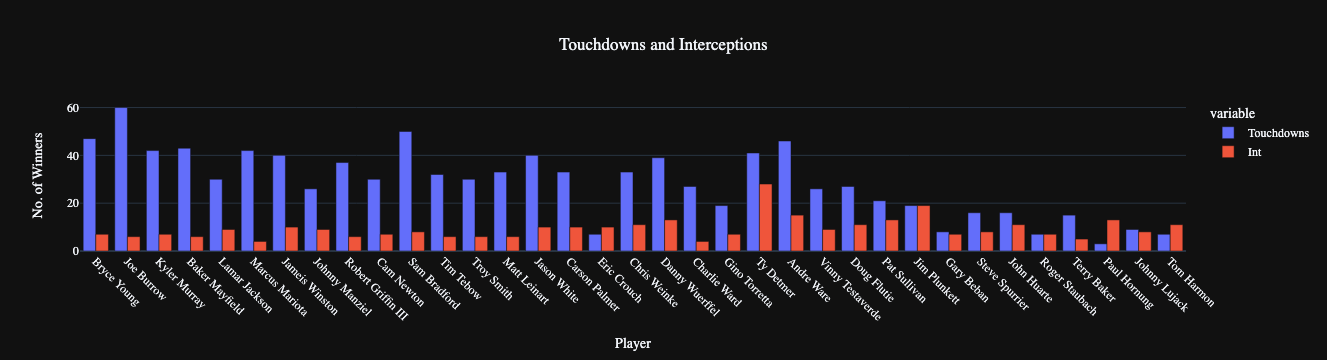

In [184]:
df_qb = df[df["Int"] >= 0]
fig = px.bar(
    df_qb, x="Player",
    y=["Touchdowns", "Int"],
    barmode="group",
    title="Touchdowns and Interceptions",
    labels={"Int":"Interceptions"})
fig.update_xaxes(tickangle=45)
fig.update_layout(
    template="plotly_dark",
    font_family="Open sans",
    title=dict(x=0.5),
    yaxis_title="No. of Winners")
fig.show()

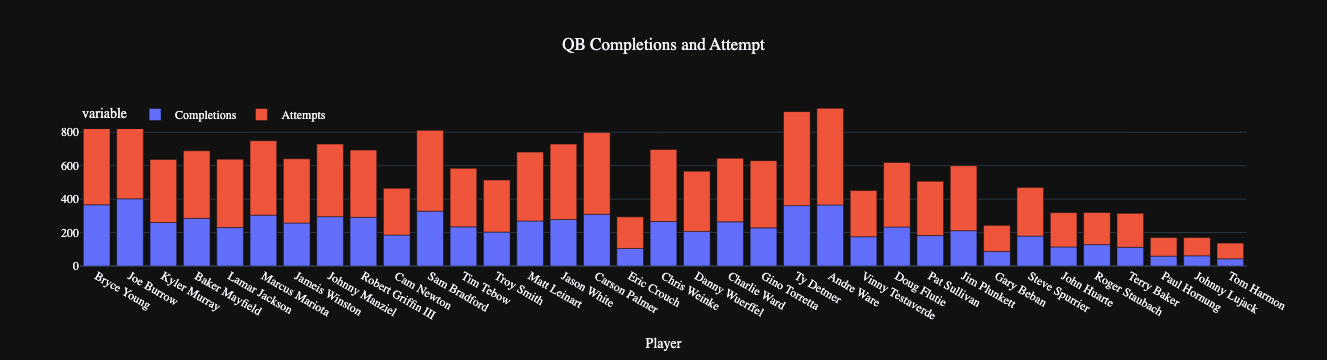

In [183]:
fig = px.bar(
    df_qb,
    x="Player",
    y=["Completions", "Attempts"],
    title="QB Completions and Attempt")
fig.update_layout(
    template="plotly_dark",
    font_family="Open sans",
    title=dict(x=0.5),
    yaxis_title="",
    legend=dict(orientation="h", y=1))
fig.show()

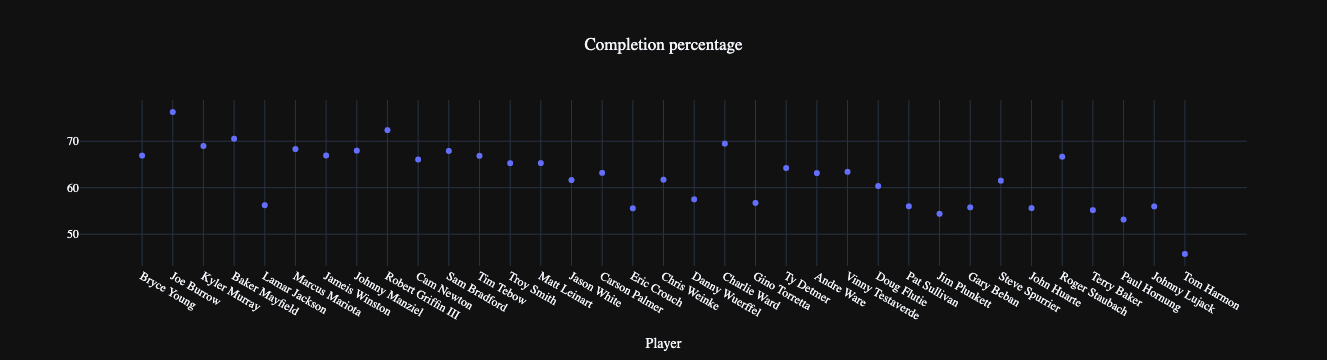

In [182]:
df["Comp_per"] = (df["Completions"]/df["Attempts"]) *100
df.Comp_per = df.Comp_per.round(2)
df_qb = df[df["Comp_per"] > 0]
fig = px.scatter(
    df_qb,
    x="Player",
    y="Comp_per",
    title="Completion percentage")
fig.update_layout(
    template="plotly_dark",
    font_family="Open sans",
    yaxis_title="",
    title=dict(x=0.5))
fig.show()

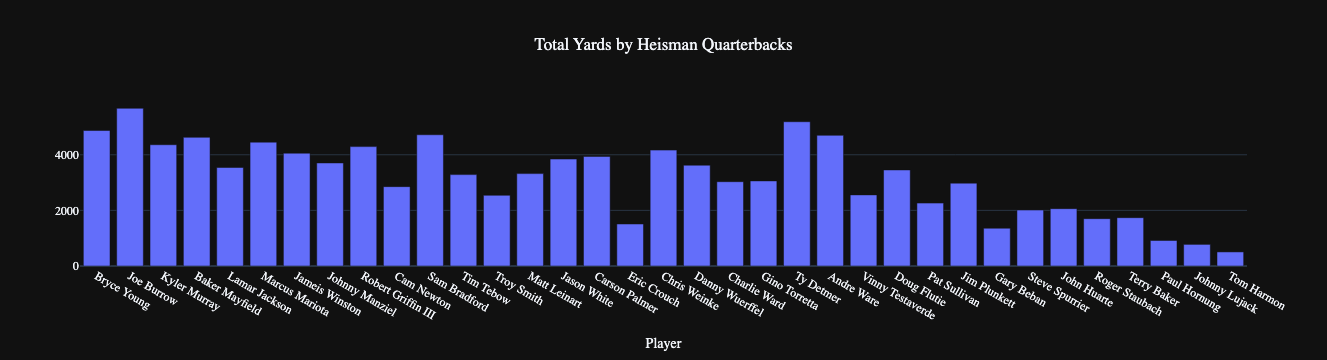

In [188]:
fig = px.bar(
    df_qb,
    x="Player",
    y="Total Yards",
    title="Total Yards by Heisman Quarterbacks")
fig.update_layout(
    template="plotly_dark",
    font_family="Open sans",
    yaxis_title="",
    title=dict(x=0.5))
fig.show()

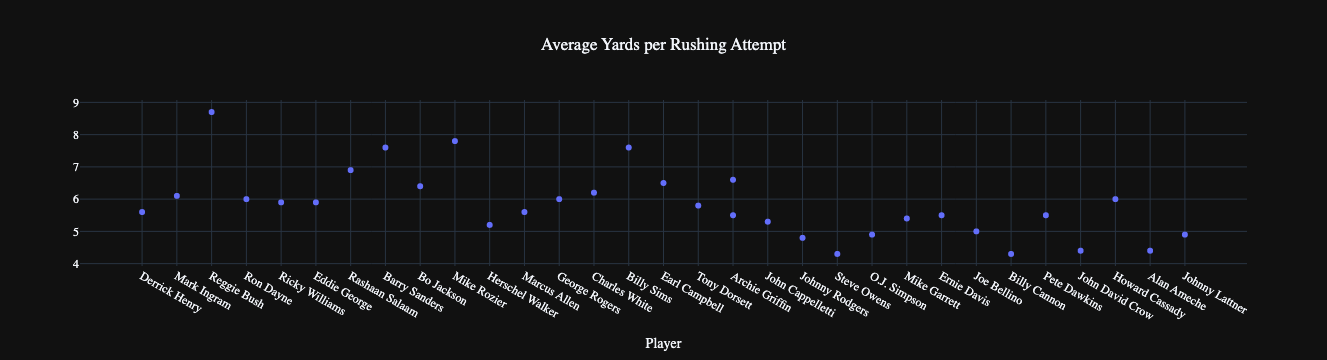

In [189]:
df_rb = df[df["Position"] == "RB"]
df_rb = df_rb[df_rb["Average Yards"] > 0]
fig = px.scatter(
    df_rb,
    x="Player",
    y="Average Yards",
    title="Average Yards per Rushing Attempt")
fig.update_layout(
    template="plotly_dark",
    font_family="Open sans",
    yaxis_title="",
    title=dict(x=0.5))
fig.show()

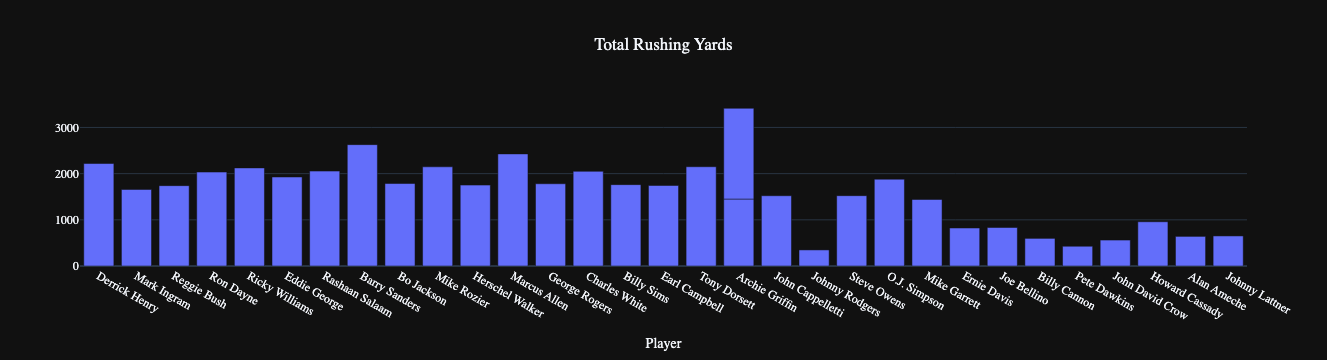

In [191]:
fig = px.bar(
    df_rb,
    x="Player",
    y="Total Yards",
    title="Total Rushing Yards")
fig.update_layout(
    template="plotly_dark",
    font_family="Open sans",
    yaxis_title="",
    title=dict(x=0.5))
fig.show()